# Assignment 5 - SPARQL queries

### Q1: 1 POINT  How many protein records are in UniProt?

To build this query, I had to find the name of the class used by Uniprot to define proteins

In [2]:
%endpoint https://sparql.uniprot.org/sparql
%format JSON

PREFIX uniprot: <http://purl.uniprot.org/core/>

SELECT (COUNT(?obj) as ?protein_records)

WHERE {
    
    ?obj a uniprot:Protein .
    
}

Endpoint set to: https://sparql.uniprot.org/sparql
Return format: JSON

protein_records
360157660


### Q2: 1 POINT How many Arabidopsis thaliana protein records are in UniProt?

To build this query, I had to look for the possible properties of proteins and the codification for organism "arabidopsis thaliana"

In [4]:
%endpoint https://sparql.uniprot.org/sparql
%format JSON

PREFIX uniprot: <http://purl.uniprot.org/core/>
PREFIX taxon: <http://purl.uniprot.org/taxonomy/>

SELECT (COUNT (*) AS ?arabidopsis_proteins)

WHERE {
    
    ?obj a uniprot:Protein ;
         uniprot:organism taxon:3702 .
    
}

Endpoint set to: https://sparql.uniprot.org/sparql
Return format: JSON

arabidopsis_proteins
136782


### Q3: 1 POINT retrieve pictures of Arabidopsis thaliana from UniProt?

To build this query, I had to look for the possible properties of "arabidopsis thaliana".

In [9]:
%endpoint https://sparql.uniprot.org/sparql
%format JSON

PREFIX uniprot: <http://purl.uniprot.org/core/>
PREFIX taxon: <http://purl.uniprot.org/taxonomy/>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>

SELECT DISTINCT ?pred AS ?arabidopsis_photos

WHERE {
    taxon:3702 foaf:depiction ?pred.
    
}

Endpoint set to: https://sparql.uniprot.org/sparql
Return format: JSON

arabidopsis_photos
https://upload.wikimedia.org/wikipedia/commons/3/39/Arabidopsis.jpg
https://upload.wikimedia.org/wikipedia/commons/thumb/6/60/Arabidopsis_thaliana_inflorescencias.jpg/800px-Arabidopsis_thaliana_inflorescencias.jpg


### Q4: 1 POINT:  What is the description of the enzyme activity of UniProt Protein Q9SZZ8

To build this query, I had to look for the property that linked a protein to its Uniprot code (which turned out to be the protein URI itself...), the properties of proteins, the properties of enzimes and the properties of activities.

In [10]:
%endpoint https://sparql.uniprot.org/sparql
%format JSON

PREFIX uniprot: <http://purl.uniprot.org/core/>
PREFIX taxon: <http://purl.uniprot.org/taxonomy/>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX uniprotkb: <http://purl.uniprot.org/uniprot/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT DISTINCT ?description

WHERE {
    uniprotkb:Q9SZZ8 uniprot:enzyme ?enzime.
    ?enzime uniprot:activity ?activity.
    ?activity rdfs:label ?description .
}

Endpoint set to: https://sparql.uniprot.org/sparql
Return format: JSON

description
Beta-carotene + 4 reduced ferredoxin [iron-sulfur] cluster + 2 H(+) + 2 O(2) = zeaxanthin + 4 oxidized ferredoxin [iron-sulfur] cluster + 2 H(2)O.


### Q5: 1 POINT:  Retrieve the proteins ids, and date of submission, for proteins that have been added to UniProt this year   (HINT Google for “SPARQL FILTER by date”)

To build this query, I had to find the properties of proteins, search how to filter by date and look for a way to split a URI.

In [13]:
%endpoint https://sparql.uniprot.org/sparql
%format JSON

PREFIX uniprot: <http://purl.uniprot.org/core/>
PREFIX taxon: <http://purl.uniprot.org/taxonomy/>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX uniprotkb: <http://purl.uniprot.org/uniprot/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT (strafter(xsd:string(?id),"uniprot/") as ?protein_id) ?date 

WHERE {
    ?id a uniprot:Protein.
    ?id uniprot:created ?date.
  FILTER (year(?date) = 2021 )

} ORDER BY ?date


Endpoint set to: https://sparql.uniprot.org/sparql
Return format: JSON

Error: Query processing error:

This query results in error each time I execute it, but works perfectly in the Uniprot SPARQL endpoint. You could try running it there, but as a quick proof that it works I leave below an image with the first results:

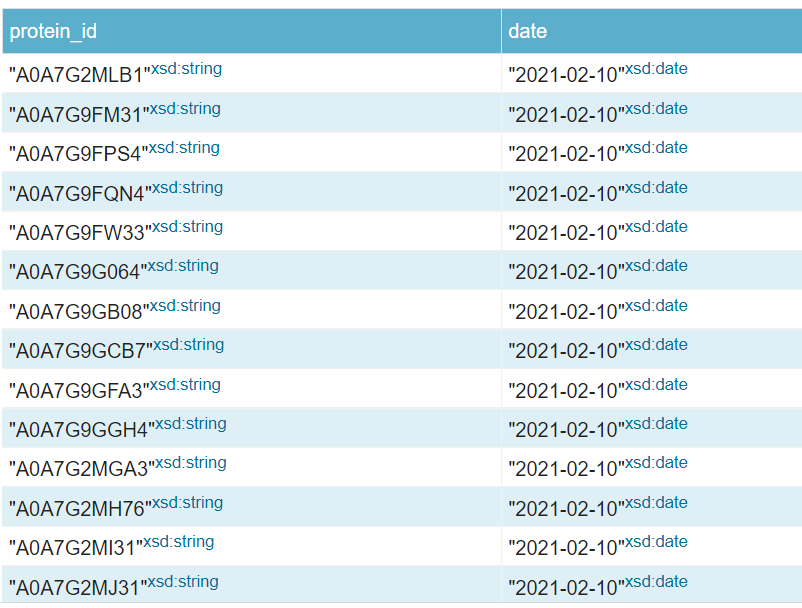

### Q6: 1 POINT How  many species are in the UniProt taxonomy?


In [ ]:
%endpoint https://sparql.uniprot.org/sparql
%format JSON

PREFIX uniprot: <http://purl.uniprot.org/core/>
PREFIX taxon: <http://purl.uniprot.org/taxonomy/>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX uniprotkb: <http://purl.uniprot.org/uniprot/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT (COUNT(DISTINCT ?pred) as ?number_of_organisms)

WHERE {
    ?obj uniprot:organism ?pred .
}

Endpoint set to: https://sparql.uniprot.org/sparql
Return format: JSON

The query above took a lot of time even in the Uniprot SPARQL endpoint, so I leave below an image of the result

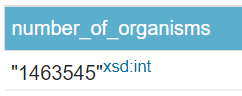

### Q7: 2 POINT  How many species have at least one protein record?


In [14]:
%endpoint https://sparql.uniprot.org/sparql
%format JSON

PREFIX uniprot: <http://purl.uniprot.org/core/>
PREFIX taxon: <http://purl.uniprot.org/taxonomy/>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX uniprotkb: <http://purl.uniprot.org/uniprot/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT (COUNT(DISTINCT ?pred) as ?number_of_organisms_with_protein_records)

WHERE {
    ?obj a uniprot:Protein .
    ?obj uniprot:organism ?pred .
}


Endpoint set to: https://sparql.uniprot.org/sparql
Return format: JSON

number_of_organisms_with_protein_records
1266002


In case the query above doesn't return any result, here is a screenshot of the Uniprot SPARQL endpoint:

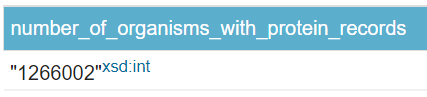

### Q8: 3 points:  find the AGI codes and gene names for all Arabidopsis thaliana  proteins that have a protein function annotation description that mentions “pattern formation”

To build this query, I had to find the different types of annotations that a protein can have, the properties of functional annotations, and the properties of gene objects.

In [1]:
%endpoint https://sparql.uniprot.org/sparql
%format JSON

PREFIX uniprot: <http://purl.uniprot.org/core/>
PREFIX taxon: <http://purl.uniprot.org/taxonomy/>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX uniprotkb: <http://purl.uniprot.org/uniprot/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT DISTINCT ?AGI_code ?gene_name

WHERE {
  	?prot a uniprot:Protein .
	?prot uniprot:organism taxon:3702 .
  	?prot uniprot:annotation ?anot .
  	?anot a uniprot:Function_Annotation .
  	?anot rdfs:comment ?desc .
  	?prot uniprot:encodedBy ?gene .
  	?gene uniprot:locusName ?AGI_code .
  	?gene uniprot:orfName ?gene_name .
  FILTER regex(?desc, "pattern formation")
}

Endpoint set to: https://sparql.uniprot.org/sparql
Return format: JSON

AGI_code,gene_name
At3g54220,F24B22.180
At4g21750,F17L22.210
At1g69670,T6C23.13
At1g13980,F7A19.7
At1g13980,F16A14.20
At1g63700,F24D7.11
At5g40260,MSN9.17
At5g40260,MSN9_160
At2g46710,T3A4.9
At1g26830,T2P11.2


### Q9: 4 POINTS:  what is the MetaNetX Reaction identifier (starts with “mnxr”) for the UniProt Protein uniprotkb:Q18A79

To build this query I had to llok for the properties of Peptides and Reactions in MetaNetX

In [3]:
%endpoint https://rdf.metanetx.org/sparql
%format JSON

PREFIX uniprot: <http://purl.uniprot.org/core/>
PREFIX taxon: <http://purl.uniprot.org/taxonomy/>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX uniprotkb: <http://purl.uniprot.org/uniprot/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX mnx:<https://rdf.metanetx.org/schema/>

SELECT DISTINCT (strafter(xsd:string(?identifier),"reac/") as ?reaction_id)

where {
        ?peptide a mnx:PEPT .
        ?peptide mnx:peptRefer uniprotkb:Q18A79 .
        ?cata a mnx:CATA .
        ?cata mnx:pept ?peptide .
        ?gpr a mnx:GPR .
        ?gpr mnx:cata ?cata .
        ?gpr mnx:reac ?reac .
        ?reac a mnx:REAC .
        ?reac mnx:mnxr ?identifier .

}

Endpoint set to: https://rdf.metanetx.org/sparql
Return format: JSON

reaction_id
MNXR165934
MNXR145046


### Q10: 5 POINTS:  What is the official Gene ID (UniProt calls this a “mnemonic”) and the MetaNetX Reaction identifier (mnxr…..) for the protein that has “Starch synthase” catalytic activity in Clostridium difficile (taxon 272563).

The query below is very probably not correct. 

I could not find the restriction for the protein to have "starch synthase" catalytic activity anywhere in the metanetx database. I tried searching in all classes' properties, but any of them contained text that could mention something similar to "starch synthase". I found on the Internet some reactions related to "starch synthase", but they were not binded to any GPR nor MNET.

Then I tried searching in the Uniprot database. Any of the Catalytic Activity Annotations nor Catalytic Activities for proteins of Clostridium difficile mentioned anything about "starch synthase", and my best attempt has been looking in the comment of the enzime associated to the protein. This outputs some proteins as result, but they are probably not correct as there is no reaction_id related to them in MetaNetX.

In [12]:
%endpoint http://sparql.uniprot.org/sparql
%format JSON

PREFIX uniprot: <http://purl.uniprot.org/core/>
PREFIX taxon: <http://purl.uniprot.org/taxonomy/>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX uniprotkb: <http://purl.uniprot.org/uniprot/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX mnx:<https://rdf.metanetx.org/schema/>

SELECT ?gene_id ?reaction_id

WHERE {
    SERVICE <http://sparql.uniprot.org/sparql> {
         select distinct ?prot ?gene_id

         where {
            ?prot a uniprot:Protein .
            ?prot uniprot:organism taxon:272563 .
            ?prot up:enzyme ?enz .
            ?enz rdfs:comment ?desc .
            ?prot uniprot:mnemonic ?gene_id .
            FILTER regex(?desc, "starch synthase")
 
         }
    }
     SERVICE <https://rdf.metanetx.org/sparql> {
         OPTIONAL {
             ?prot a mnx:PEPT .

             ?cata a mnx:CATA .
             ?cata mnx:pept ?prot .

             ?gpr a mnx:GPR .
             ?gpr mnx:cata ?cata .

             ?gpr mnx:reac ?reac .
             ?reac a mnx:REAC .
             ?reac mnx:mnxr ?reaction_id .
            }
     }
} 

Endpoint set to: http://sparql.uniprot.org/sparql
Return format: JSON

Error: SPARQL error: QueryBadFormed: a bad request has been sent to the endpoint, probably the sparql query is bad formed. 

Response:
b'<!DOCTYPE html SYSTEM "about:legacy-compat">\n<html xmlns="http://www.w3.org/1999/xhtml" lang="en" xml:lang="en"><head><title>UniProt</title><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"/><link href="/" rel="home"/><link href="/base.css" type="text/css" rel="stylesheet"/><link type="image/vnd.microsoft.icon" href="/uniprot-favicon.ico" rel="shortcut icon"/><link href="/uniprot-sparql.css" type="text/css" rel="stylesheet"/><link href="http://creativecommons.org/licenses/by/4.0/" rel="license"/><script src="//cdn.jsdelivr.net/npm/yasgui-yasqe@2.11.22/dist/yasqe.bundled.min.js"></script><link type="text/css" rel="stylesheet" href="https://cdn.jsdelivr.net/yasqe/2.2/yasqe.min.css"/><meta content="width=device-width, initial-scale=1" name="viewport"/><meta content="no-referrer" name="referrer"/></head><body typeof="schema:WebPage"><div id="masthead-container"><div id="local-masthead"><div id="local-title"><h1><a accesskey="1" href="https://www.uniprot.org/"><img alt="" src="https://www.uniprot.org/images/logos/Logo_medium.png" title="UniProt home"/></a></h1></div><div id="nav"><ul id="local-nav"><li><a href="/sparql">SPARQL</a></li><li class="first"><a href="https://www.uniprot.org/downloads">Downloads</a></li><li class="functional last"><a accesskey="9" href="https://www.uniprot.org/contact">Contact</a></li><li class="functional"><a rel="help" href="https://www.uniprot.org/help/">Documentation/Help</a></li></ul></div></div></div><a accesskey="2" href="#content" hidden="hidden">Skip Header</a><main class="sparql results" id="content"><section class="error" id="page-header"><h2 class="page-title">Query evaluation exception.</h2><p>: SPARQL execute failed:[#867865860\nPREFIX uniprot: &lt;http://purl.uniprot.org/core/&gt;\nPREFIX taxon: &lt;http://purl.uniprot.org/taxonomy/&gt;\nPREFIX foaf: &lt;http://xmlns.com/foaf/0.1/&gt;\nPREFIX uniprotkb: &lt;http://purl.uniprot.org/uniprot/&gt;\nPREFIX rdfs: &lt;http://www.w3.org/2000/01/rdf-schema#&gt;\nPREFIX xsd: &lt;http://www.w3.org/2001/XMLSchema#&gt;\nPREFIX mnx:&lt;https://rdf.metanetx.org/schema/&gt;\nSELECT ?gene_id\nWHERE {\nSERVICE &lt;http://sparql.uniprot.org/sparql&gt; {\nselect distinct ?prot ?gene_id\nwhere {\n?prot a uniprot:Protein .\n?prot uniprot:organism taxon:272563 .\n?prot up:enzyme ?enz .\n?enz rdfs:comment ?desc .\n?prot uniprot:mnemonic ?gene_id .\nFILTER regex(?desc, &quot;starch synthase&quot;)\n\n}\n}\n}] \n Exception:virtuoso.jdbc4.VirtuosoException: SQ074: Line 24: SP030: SPARQL compiler, line 17: Undefined namespace prefix at \'up\' before \'?enz\'</p></section><div class="main-aside"><div id="queryform"><h3>Your query</h3><form method="get" action="/sparql/" focus="query" name="sparql-form" id="sparql-form"><button id="addPrefix" type="button">Add common prefixes</button><textarea accesskey="1" rows="10" cols="80" name="query" id="query">PREFIX uniprot: &lt;http://purl.uniprot.org/core/&gt;\nPREFIX taxon: &lt;http://purl.uniprot.org/taxonomy/&gt;\nPREFIX foaf: &lt;http://xmlns.com/foaf/0.1/&gt;\nPREFIX uniprotkb: &lt;http://purl.uniprot.org/uniprot/&gt;\nPREFIX rdfs: &lt;http://www.w3.org/2000/01/rdf-schema#&gt;\nPREFIX xsd: &lt;http://www.w3.org/2001/XMLSchema#&gt;\nPREFIX mnx:&lt;https://rdf.metanetx.org/schema/&gt;\nSELECT ?gene_id\nWHERE {\nSERVICE &lt;http://sparql.uniprot.org/sparql&gt; {\nselect distinct ?prot ?gene_id\nwhere {\n?prot a uniprot:Protein .\n?prot uniprot:organism taxon:272563 .\n?prot up:enzyme ?enz .\n?enz rdfs:comment ?desc .\n?prot uniprot:mnemonic ?gene_id .\nFILTER regex(?desc, &quot;starch synthase&quot;)\n\n}\n}\n}</textarea><input type="hidden" name="format" value="html"><button id="sparqlFormSubmitter" onclick="return false;">Submit Query</button></form></div></div></main><footer id="page-footer"><section class="small" id="copyright">\n\t\t\t&copy; 2002&ndash; <span property

In [4]:
# first version of the 10th query

%endpoint https://rdf.metanetx.org/sparql
%format JSON

PREFIX uniprot: <http://purl.uniprot.org/core/>
PREFIX taxon: <http://purl.uniprot.org/taxonomy/>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX uniprotkb: <http://purl.uniprot.org/uniprot/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX mnx:<https://rdf.metanetx.org/schema/>

SELECT ?gene_id ?reaction_id

WHERE {
    SERVICE <https://rdf.metanetx.org/sparql> {
         select distinct (?pept as ?prot_uri) ?reaction_id

         where {

             ?pept a mnx:PEPT .

             ?cata a mnx:CATA .
             ?cata mnx:pept ?pept .

             ?gpr a mnx:GPR .
             ?gpr mnx:cata ?cata .

             ?mnet a mnx:MNET .
             ?mnet mnx:gpr ?gpr .
             ?mnet mnx:taxid taxon:272563 .

             ?gpr mnx:reac ?reac .
             ?reac a mnx:REAC .
             ?reac mnx:mnxr ?reaction_id .

         }
    }
     SERVICE <http://sparql.uniprot.org/sparql> {
         OPTIONAL {?prot_uri uniprot:mnemonic ?gene_id }
     }
} 


Endpoint set to: https://rdf.metanetx.org/sparql
Return format: JSON

gene_id,reaction_id
,https://rdf.metanetx.org/reac/MNXR113698
,https://rdf.metanetx.org/reac/MNXR171052
,https://rdf.metanetx.org/reac/MNXR188623
,https://rdf.metanetx.org/reac/MNXR138059
,https://rdf.metanetx.org/reac/MNXR138674
,https://rdf.metanetx.org/reac/MNXR146568
,https://rdf.metanetx.org/reac/MNXR153054
,https://rdf.metanetx.org/reac/MNXR153054
,https://rdf.metanetx.org/reac/MNXR153054
,https://rdf.metanetx.org/reac/MNXR153054
